In [1]:
suppressMessages(library(data.table))
suppressMessages(library(ggplot2))
suppressMessages(library(matrixStats))
suppressMessages(library(ggsci))
suppressMessages(library(magrittr))
suppressMessages(library(ggrepel))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(ggpubr))
suppressMessages(library(circlize))
suppressMessages(library(hrbrthemes))
options(warn=-1) # use options(warn=0) To turn warnings back on
options(dplyr.summarise.inform = FALSE)
source("../src/confidence_interval.r")
source("../src/createEmptyDf.r")
source("../src/plot_iso_structure.r")

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_Fig04.RData")
load("../data/data_Fig02extra.RData")

In [4]:
# head(out)

In [5]:
# head(mat_var) # top 5000 high variable isoforms among cell types after normalizing by Read Per Million
# dim(mat_var)

In [6]:
# head(mat) # specific isoforms after normalizing by Read Per Million
# dim(mat)

In [7]:
# head(col_lab) # with label
# dim(col_lab)

In [8]:
# head(elavl) # ELAVL1 RIP-seq peaks and their region, isoform expression of RNA-seq derived from relevant cells (LCL, GEUVADIS)
# dim(elavl)

pdf 
  2

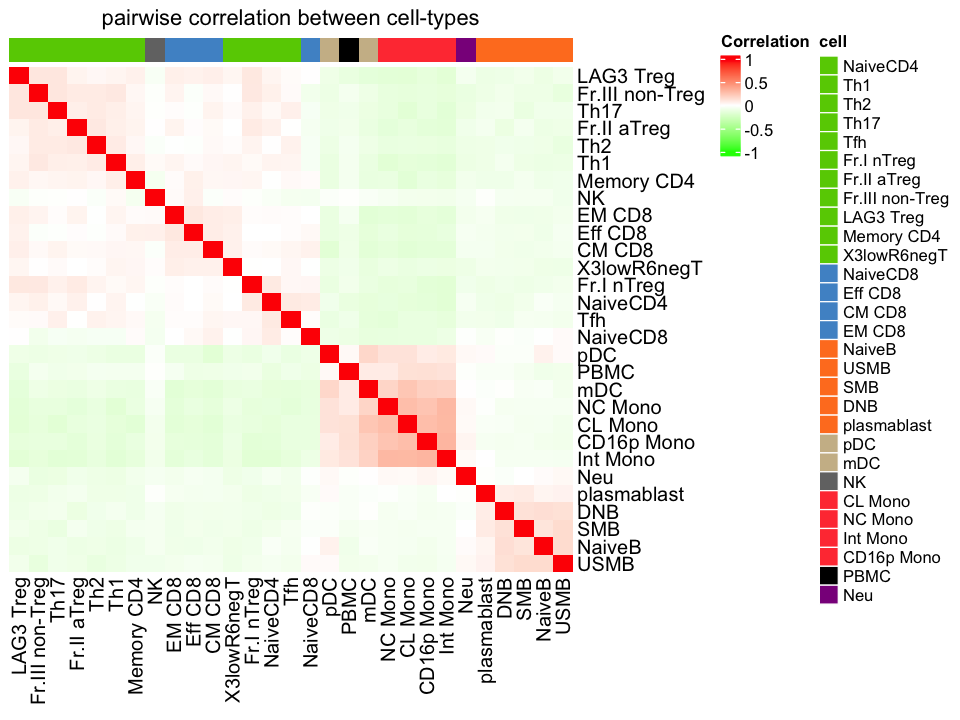

In [9]:
# hirarchial clustering by correlation of on trancript ratio among cell types using the top 5000 variable isoforms

ha = HeatmapAnnotation(cell = factor(colnames(mat_var), levels = colnames(mat_var)),
                       col = list(cell = c("NaiveCD4" = "chartreuse3","Th1" = "chartreuse3","Th2" = "chartreuse3","Th17" = "chartreuse3","Tfh" = "chartreuse3","Fr.I nTreg" = "chartreuse3","Fr.II aTreg" = "chartreuse3","Fr.III non-Treg" = "chartreuse3","LAG3 Treg" = "chartreuse3","Memory CD4" = "chartreuse3","X3lowR6negT" = "chartreuse3",
                                           "NaiveCD8" = "steelblue3","Eff CD8" = "steelblue3","CM CD8" = "steelblue3","EM CD8" = "steelblue3",
                                           "NaiveB" = "chocolate1","USMB" = "chocolate1","SMB" = "chocolate1","DNB" = "chocolate1","plasmablast" = "chocolate1",
                                           "pDC" = "wheat3","mDC" = "wheat3",
                                           "NK" = "grey45",
                                           "CL Mono" = "brown1","NC Mono" = "brown1","Int Mono" = "brown1","CD16p Mono" = "brown1",
                                           "PBMC" = "black",
                                           "Neu" = "darkmagenta")),
                       show_annotation_name = FALSE)
                
options(repr.plot.width=8, repr.plot.height=6)
g_a = Heatmap(cor(mat_var), name = "cor", 
        top_annotation = ha,
        col = circlize::colorRamp2(c(-1, 0, 1), c("green", "white", "red")), 
        show_row_names = TRUE, show_column_names = TRUE, show_row_dend = FALSE, show_column_dend = FALSE, 
        column_title = "pairwise correlation between cell-types",
        heatmap_legend_param = list(title = "Correlation"))
g_a

pdf("./Figure4a.pdf", width=8, height=6)
g_a
dev.off()

In [10]:
head(col_lab)
colnames(col_lab)


,NaiveCD4,Th1,Th2,Th17,Tfh,Fra1,Fra2.aTreg,Fra3,LAG3Treg,MemoryCD4,⋯,specific_cell_LR,specific_cell_LRgroup,specific_cell_SR,id,immunexut_specific,group,iso_vars,var_rank_all,immune_or_TF,var_rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>,<int>
6eb1ae6a-b0d9-46c7-a6c7-fb63b4535884,55.89366,18.514500,13.550920,23.16487,27.007830,26.735520,18.7686700,22.670130,36.4852500,25.797280,⋯,NaiveCD4,NA,NA,SMBD1P_SDHAP2-isoform [NaiveCD4],NA,NA,163.66020,1,FALSE,1
5049649c-cb50-4d59-a206-e116df4e8d2d,32.60464,6.732545,7.743384,0.00000,10.803130,1.782368,0.7820278,3.400520,10.3260100,11.906440,⋯,NaiveCD4,NA,NA,ANKHD1-isoform [NaiveCD4],NA,NA,42.60983,2,FALSE,2
ENST00000483764.5,25.15215,5.049408,19.358460,14.02084,16.204700,7.129472,13.2944700,5.667533,6.8840090,21.828470,⋯,NaiveCD4,NA,NA,MRPL28-isoform [NaiveCD4],Fr._II_eTreg,Fra2.aTreg,41.65741,3,FALSE,3
f02ab870-b4c0-49a2-8b1e-4ec8e680752d,27.94683,5.049408,13.550920,12.19204,10.803130,7.129472,8.6023050,2.267013,17.2100200,19.844070,⋯,NaiveCD4,NA,NA,CHMP1A-isoform [NaiveCD4],NA,NA,37.52324,4,FALSE,4
3aa81c7a-5700-4bf1-a456-c160f558cdb1,24.22059,5.049408,9.679230,6.70562,5.401566,5.941227,6.2562220,4.534027,13.0796163,3.968813,⋯,NaiveCD4,NA,NA,WDR70-isoform [NaiveCD4],NA,NA,33.44677,5,FALSE,5
74c0d9bb-87b0-44f8-9fc1-21997987337b,23.28903,10.098820,0.000000,12.80164,0.000000,13.070700,4.6921670,10.201560,0.6884009,1.984407,⋯,NaiveCD4,NA,NA,BRAP-isoform [NaiveCD4],NA,NA,30.23785,6,FALSE,6


[1] "NaiveCD4"              "Th1"                   "Th2"                  
 [4] "Th17"                  "Tfh"                   "Fra1"                 
 [7] "Fra2.aTreg"            "Fra3"                  "LAG3Treg"             
[10] "MemoryCD4"             "Thx"                   "NaiveCD8"             
[13] "CD8effector"           "CD8centralmem"         "CD8effectormem"       
[16] "NaiveB"                "unswmemoryB"           "swmemoryB"            
[19] "DNB"                   "plasmablast"           "plasmacytoidDC"       
[22] "myeloidDC"             "NK"                    "monocyteCD16"         
[25] "monocyteCD16minus"     "nonclassicalMonocyte"  "intermediateMonocyte" 
[28] "PBMC"                  "Neutrophil"            "associated_gene"      
[31] "InnateDB"              "TF"                    "specific_cell_LR"     
[34] "specific_cell_LRgroup" "specific_cell_SR"      "id"                   
[37] "immunexut_specific"    "group"                 "iso_vars"             
[40] "var_rank_all"          "immune_or_TF"          "var_rank"

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



pdf 
  2

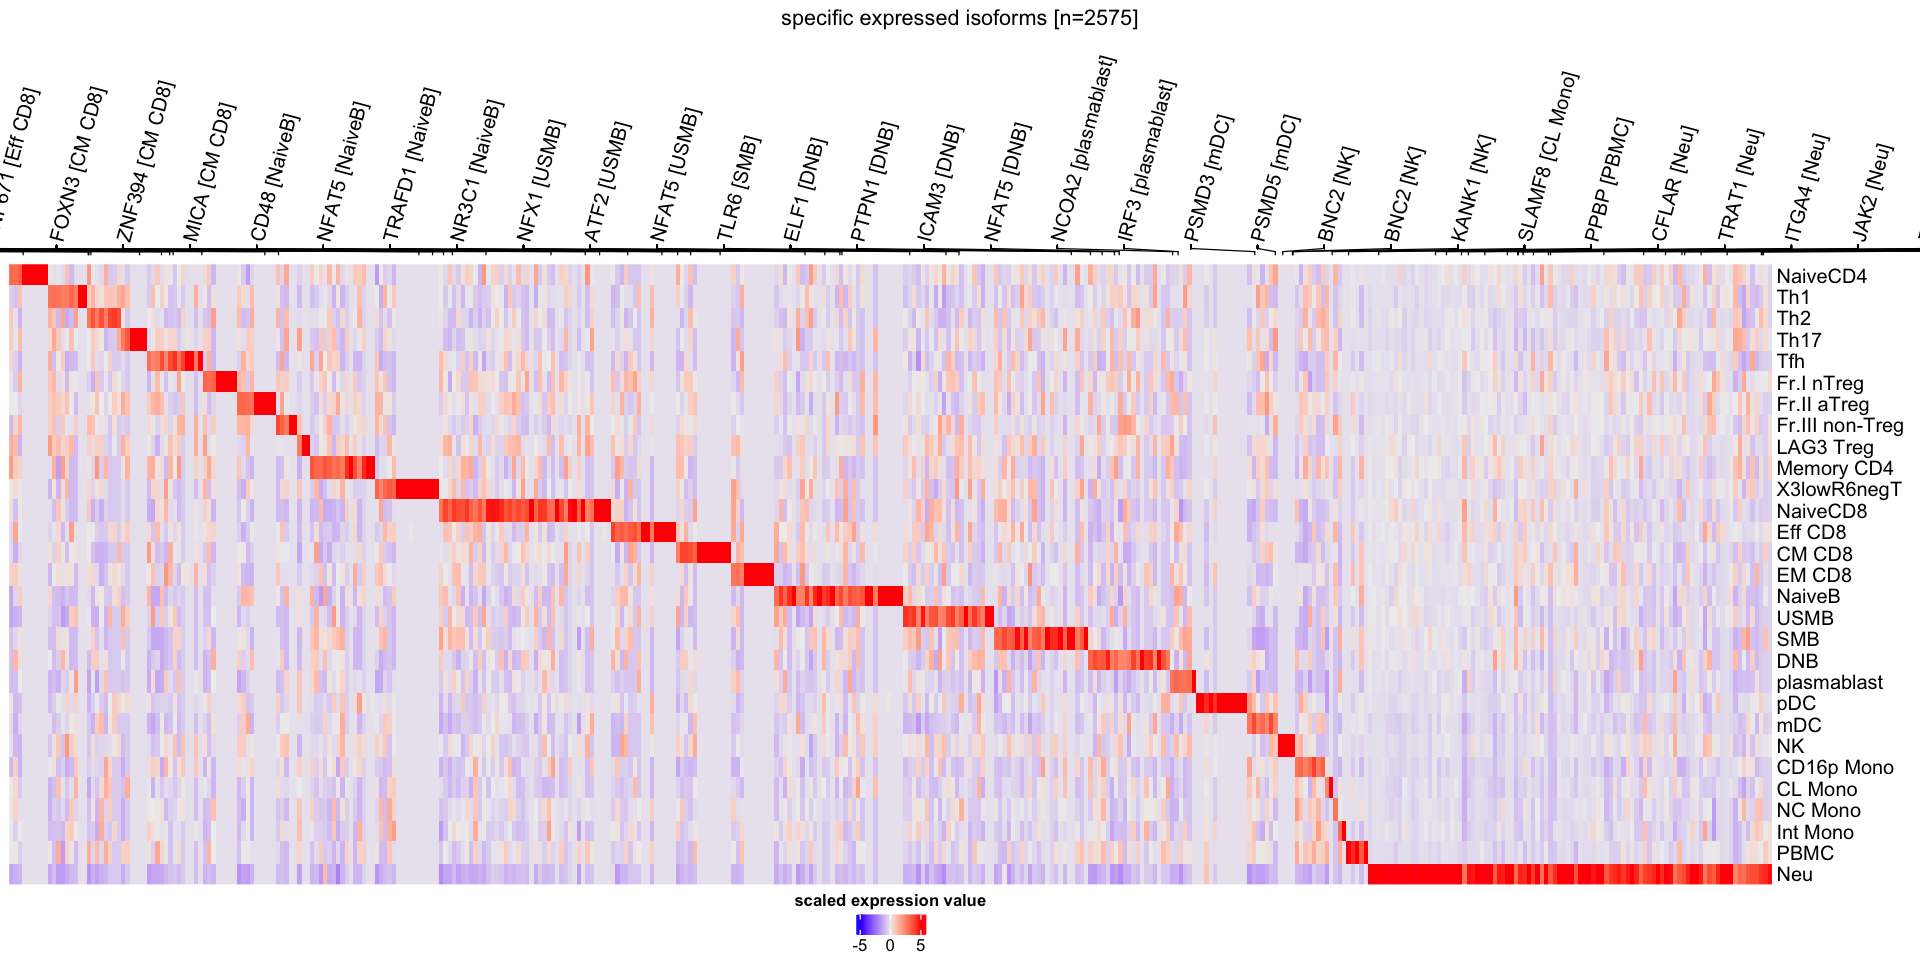

In [11]:
# specific isoforms

options(repr.plot.width=16, repr.plot.height=8)
# gwas_genes: efotraits_EFO_0000540-associations-2022-06-14.csv

ht_list = 
  HeatmapAnnotation(
    label = anno_mark(at = which(col_lab$immune_or_TF & (col_lab$associated_gene %in% gwas_genes)), 
                      labels = gsub("-isoform","",col_lab[col_lab$immune_or_TF & col_lab$associated_gene %in% gwas_genes, ]$id), 
                      side = "top",
                      labels_rot = 75,
                      labels_gp = gpar(fontsize = 12
                                       # col = rep(c("palegreen","palegreen3","palegreen4","chartreuse","chartreuse3","chartreuse4","green1","green3","olivedrab1","olivedrab2","olivedrab3",
                                       #             "steelblue1","steelblue2","steelblue3","steelblue4",
                                       #             "wheat1","wheat2","wheat3",
                                       #             "grey90",
                                       #             "brown1","brown2","brown3","brown4",
                                       #             "black",
                                       #             "darkmagenta"),each=3)
                      ), 
                      padding = 0.8,
                      link_width = unit(0.1, "mm"),
                      link_height = unit(3, "mm")
    )) %v%
  Heatmap(scale(t(mat)), 
          cluster_columns = FALSE, show_column_names = FALSE, show_column_dend = FALSE,
          cluster_rows = FALSE, 
          row_names_gp = gpar(fontsize = 12, axis = 45),
          heatmap_legend_param = list(
            # at = c(-2, 0, 2),
            # labels = c("low", "zero", "high"),
            title = "scaled expression value",
            legend_height = unit(4, "cm"),
            direction = "horizontal",
            title_position = "topcenter") 
  ) 
draw(column_title = paste0("specific expressed isoforms [n=",nrow(mat),"]"), ht_list, heatmap_legend_side="bottom")

pdf("./Figure4b.pdf", width=16, height=6.5)
draw(# column_title = paste0("specific expressed isoforms [n=",nrow(mat),"]"), 
    ht_list, heatmap_legend_side="bottom")
dev.off()


[1] "unique TSS"
[1] "unique CDS"
[1] "unique LE"
[1] "repeat SJ"
[1] "repeat CDS"
[1] "repeat TTS"


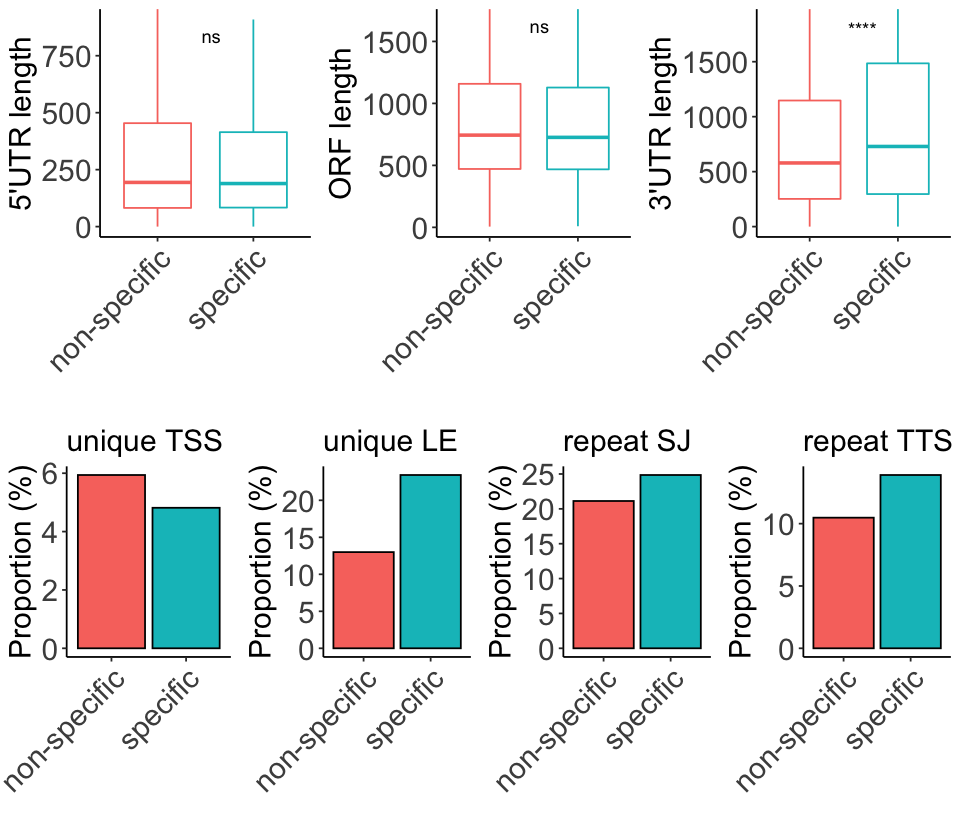

pdf 
  2

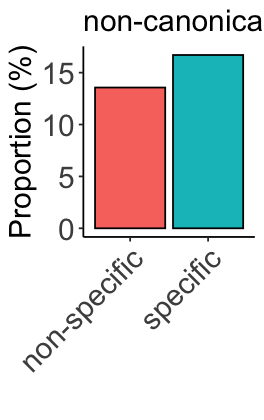

In [12]:
# compare length between specific isoforms and non-specific isoforms
options(repr.plot.width=8, repr.plot.height=7)
# compare length
variable = "specificity_LR"
for (region in c("five_utr_length","CDS_length","three_utr_length")){
  lab = dplyr::case_when(
    region == "five_utr_length" ~ "5'UTR length",
    region == "CDS_length" ~ "ORF length",
    region == "three_utr_length" ~ "3'UTR length"
  )
  g = out %>%
    dplyr::mutate(strata = eval(parse(text = variable)),
                  strata = dplyr::case_when(
                    strata ~ "specific",
                    !strata ~ "non-specific"
                  )) %>%
    ggboxplot(., x="strata", y=region,
              color = "strata",
              outlier.shape = NA) + 
    coord_cartesian(ylim = quantile(eval(parse(text=paste0("out$",region))), c(0, 0.9), na.rm=TRUE)) +
    stat_compare_means(
      label = "p.signif",
      label.y = quantile(eval(parse(text=paste0("out$",region))), 0.88, na.rm=TRUE),
      label.x.npc = "center") + 
    theme_classic() +
    ylab(lab) +
    xlab("") +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          legend.position = "none",
          plot.title = element_text(size=18),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size =18),
          axis.text.y = element_text(size = 18),
          axis.text.x = element_text(size = 18,angle = 45, hjust=1),
          legend.text =  element_text(size = 18), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))
  assign(paste0("g_",region),g)
}

for (variable in c("unique_TSS","unique_CDS","unique_LE","repeat_SJ","repeat_CDS","repeat_TTS")){
    print(gsub("_"," ", variable))
  g = out %>%
    dplyr::mutate(strata = eval(parse(text=variable)),
                  specificity_LR = ifelse(specificity_LR, "specific","non-specific")) %>%
    dplyr::group_by(strata,specificity_LR) %>%
    dplyr::summarise(count = n()) %>%
    as.data.frame() %>%
    dplyr::group_by(specificity_LR) %>%
    dplyr::mutate(proportion = 100*count/sum(count)) %>%
    dplyr::filter(strata) %>%
    ggplot(., aes(x=specificity_LR, y=proportion, fill=specificity_LR)) +
    geom_bar(stat="identity", color="black", position=position_dodge())+
    theme_classic() + 
    ggtitle (gsub("_"," ", variable) %>% gsub("CDS","ORF",.) %>% gsub("repeat_SJ","repeat junction sites",.)) +
    ylab("Proportion (%)") +
    xlab("") +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          legend.position = "none",
          plot.title = element_text(size=18),
          axis.title.x = element_text(size=18),
          axis.title.y = element_text(size =18),
          axis.text.y = element_text(size = 18),
          axis.text.x = element_text(size = 18,angle = 45, hjust=1),
          legend.text =  element_text(size = 18), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))
    assign(paste0("g_",variable),g)
}

g_polyA = out %>%
  dplyr::mutate(polyA_motif = ifelse(polyA_motif=="no-PAS","non canonical PAS","canonical PAS"),
                specificity_LR = ifelse(specificity_LR, "specific","non-specific")) %>%
  dplyr::group_by(polyA_motif,specificity_LR) %>%
  dplyr::summarise(count = n()) %>%
  as.data.frame() %>%
  dplyr::group_by(specificity_LR) %>%
  dplyr::mutate(proportion = 100*count/sum(count)) %>%
  dplyr::filter(polyA_motif == "non canonical PAS") %>%
  ggplot(., aes(x=specificity_LR, y=proportion, fill=specificity_LR)) +
  geom_bar(stat="identity", color="black", position=position_dodge())+
  theme_classic() + 
  # facet_wrap( . ~ polyA_motif, scales = "free", nrow = 1) +
  ggtitle ("non-canonical PAS") +
  ylab("Proportion (%)") +
  xlab("") +
  theme(strip.text.x=element_text(size=9, color="black", face="bold"),
        strip.text.y=element_text(size=9, color="black", face="bold"),
        legend.position = "none",
        plot.title = element_text(size=18),
        axis.title.x = element_text(size=18),
        axis.title.y = element_text(size =18),
        axis.text.y = element_text(size = 18),
        axis.text.x = element_text(size = 18,angle = 45, hjust=1),
        legend.text =  element_text(size = 18), 
        legend.key.size = grid::unit(0.8, "lines"),
        legend.title = element_text(size = 0, hjust = 0))
ggpubr::ggarrange(ggarrange(g_five_utr_length,g_CDS_length,g_three_utr_length, ncol = 3, align = "h",widths = c(1,1,1),font.label = list(size = 0, color = "black")), 
                  ggarrange(g_unique_TSS,g_unique_LE,g_repeat_SJ,g_repeat_TTS, ncol = 4, align = "h",widths = c(1,1,1),font.label = list(size = 0, color = "black")),      
                  nrow=2, 
                  heights = c(1,1),
                  labels = "",
                  legend = "none")

options(repr.plot.width=2.2, repr.plot.height=3.5)
g_polyA
pdf("./Figure4c.pdf", width=8, height=7)
ggpubr::ggarrange(ggarrange(g_five_utr_length,g_CDS_length,g_three_utr_length, ncol = 3, align = "h",widths = c(1,1,1),font.label = list(size = 0, color = "black")), 
                  ggarrange(g_unique_TSS,g_unique_LE,g_repeat_SJ,g_repeat_TTS, ncol = 4, align = "h",widths = c(1,1,1),font.label = list(size = 0, color = "black")),      
                  nrow=2, 
                  heights = c(1,1),
                  labels = "",
                  font.label = list(size = 0, color = "black"),
                  legend = "none")
dev.off()


In [13]:
# enrichment of RBP binding motif by RBPmap
## specific isoforms and others (LR cell-types, SR cell-types, SR stimulus)
## translational efficiency top10 vs bottom10)

length(unique(pval_rbp$RBP)) # total number of tested RBP

# ELAVL1
pval_rbp %>%
  dplyr::filter(RBP=="HuR") %>%
  dplyr::arrange(-CI_up)

[1] 132

RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HuR,1.695455e-125,"bottom10: 63.15,others: 79.13,top10:108.55",0.5817116,1.7190656,1.6413194,1.8003825,te_rank,3UTR
HuR,6.982415e-32,"FALSE:47.18,TRUE:75.53",0.6246448,1.6009272,1.4778756,1.7337880,specificity_SR_stim,CDS
HuR,1.851909e-30,"FALSE: 78.90,TRUE:118.81",0.6640217,1.5059504,1.4028698,1.6168342,specificity_SR_stim,3UTR
HuR,4.028083e-09,"FALSE:18.50,TRUE:26.05",0.7099577,1.4085286,1.2533622,1.5798002,specificity_SR_stim,5UTR
HuR,5.010927e-04,"FALSE:18.54,TRUE:24.68",0.7515222,1.3306284,1.1285508,1.5625551,specificity_SR_celltype,5UTR
HuR,1.298603e-67,"FALSE: 78.25,TRUE:116.07",0.6741422,1.4833418,1.4181573,1.5515666,specificity_LRgroup,3UTR
HuR,3.153813e-22,"FALSE: 78.90,TRUE:106.52",0.7407246,1.3500147,1.2697644,1.4353584,specificity_LR,3UTR
HuR,2.002070e-22,"FALSE:1733.46,TRUE:2253.69",0.7691666,1.3001232,1.2330499,1.3716886,specificity_SR_stim,total
HuR,6.900757e-20,"FALSE:1588.89,TRUE:2033.29",0.7814381,1.2797080,1.2135625,1.3502687,specificity_SR_stim,Intron


In [14]:
# IGF2BP3
## Insulin-like growth factor 2 mRNA-binding protein 3 is a protein that in humans is encoded by the IGF2BP3 gene.
## The protein encoded by this gene is primarily found in the nucleolus, where it can bind to the 5' UTR of the insulin-like growth factor II leader 3 mRNA and may repress translation of insulin-like growth factor II during late development.
pval_rbp %>%
  dplyr::filter(RBP=="IGF2BP3") %>%
  dplyr::filter(strata=="te_rank") %>%
  dplyr::arrange(-CI_up)

RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
IGF2BP3,9.214612e-110,"bottom10:27.67,others:40.13,top10:54.05",0.5120040,1.9530737,1.8402179,2.0732535,te_rank,3UTR
IGF2BP3,7.033705e-16,"bottom10:37.48,others:44.63,top10:46.45",0.8069225,1.2392585,1.1705684,1.3120385,te_rank,CDS
IGF2BP3,3.440789e-72,"bottom10:629.76,others:789.80,top10:764.37",0.8238843,1.2137561,1.1744349,1.2544975,te_rank,total
IGF2BP3,1.165976e-77,"bottom10:549.32,others:695.44,top10:659.97",0.8323442,1.2014200,1.1621215,1.2420904,te_rank,Intron
IGF2BP3,1.126658e-109,"bottom10:15.28,others: 9.60,top10: 3.91",3.9110452,0.2556872,0.2243935,0.2907307,te_rank,5UTR


[1] "specificity_LR"
[1] "specificity_LRgroup"
[1] "specificity_SR_celltype"
[1] "specificity_SR_stim"
[1] "te_rank"


pdf 
  2

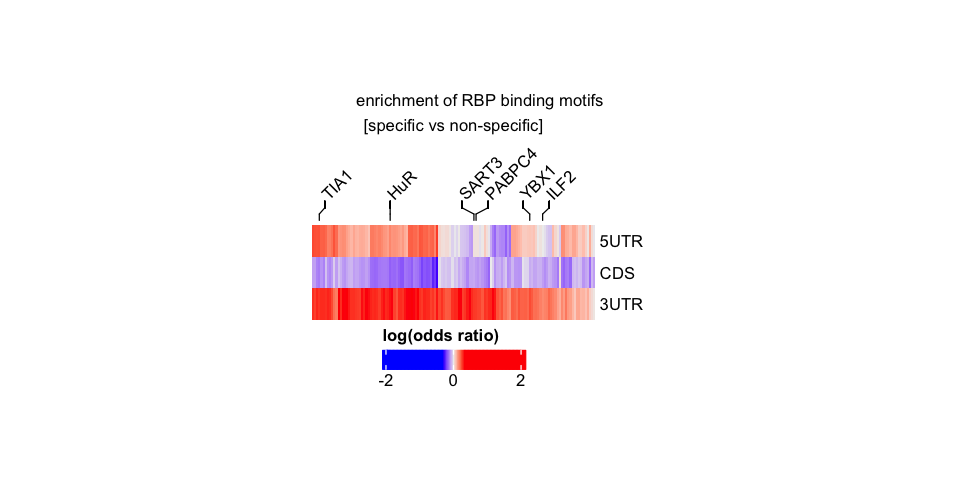

In [15]:
options(repr.plot.width=8, repr.plot.height=4)

variable="specificity_LR"
genes=c("HuR",InnateDB)
# variable="specificity_SR_celltype"
# variable="specificity_SR_stim"
# variable="InnateDB"
# variable="te_rank"
variables=c("specificity_LR","specificity_LRgroup","specificity_SR_celltype","specificity_SR_stim","te_rank")
for (variable in variables){
  print(variable)
  mat = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(log_odds = log(odds),
                  region = factor(region,levels=c("Intron","3UTR","CDS","5UTR","total"))
    ) %>%
    dplyr::select(c(log_odds,region,RBP)) %>%
    tidyr::pivot_wider(names_from = "RBP",
                       values_from = "log_odds") %>%
    as.data.frame() %>%
    tibble::column_to_rownames("region") %>%
    as.matrix()
  dim(mat)
  lab = dplyr::case_when(
    variable == "specificity_LR" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_LRgroup" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_celltype" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_stim" ~ paste0("[specific vs non-specific]"),
    variable == "te_rank" ~ paste0("translational efficiency\n[top10 vs bottom10]"))
  anno_label = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(sig = ifelse(CI_up<1 | CI_low>1, TRUE, FALSE),
                  interest = ifelse(RBP %in% genes, TRUE, FALSE)) %>%
    dplyr::group_by(RBP) %>%
    dplyr::mutate(sig = ifelse(any(sig), TRUE, FALSE)) %>%
    as.data.frame() %>%
    dplyr::distinct(RBP,sig,interest) %>%
    magrittr::set_rownames(.$RBP) %>%
    .[colnames(mat),]
  show_heatmap_legend = ifelse(variable == "specificity_LR", TRUE, FALSE)
  mat = mat[c("5UTR","CDS","3UTR"),]
  ht_list = 
    Heatmap(mat, 
            top_annotation = HeatmapAnnotation(mark = anno_mark(at = which(anno_label$interest & anno_label$sig), 
                                                                labels = anno_label[anno_label$interest & anno_label$sig, ]$RBP, 
                                                                side = "top",
                                                                labels_rot = 45,
                                                                labels_gp = gpar(fontsize = 10), 
                                                                link_width = unit(5, "mm"), 
                                                                padding = unit(3, "mm")
            )),
            cluster_columns = TRUE, show_column_names = FALSE, show_column_dend = FALSE,
            cluster_rows = FALSE, show_row_names = TRUE, show_row_dend = FALSE, 
            row_names_gp = gpar(fontsize = 10, axis = 0),
            column_title = lab, 
            column_title_side = "top",
            column_title_gp = gpar(fontsize = 10, axis = 45),
            show_heatmap_legend = show_heatmap_legend,
            heatmap_legend_param = list(
              at = c(-2, 0, 2),
              # labels = c("low", "zero", "high"),
              title = "log(odds ratio)",
              legend_height = unit(4, "cm"),
              legend_width = unit(3, "cm"),
              legend_side = "bottom",
              direction = "horizontal") , 
            width = unit(6, "cm"),
            height = unit(2, "cm")
    )
  assign(paste0("ht_list_",variable),ht_list)
}

draw(column_title = "enrichment of RBP binding motifs", 
     column_title_gp = gpar(fontsize = 10, axis = 45),
     ht_list_specificity_LR, 
     merge_legends = TRUE,
     heatmap_legend_side="bottom")

pdf("./Figure4d.pdf", width=4, height=3)
draw(column_title = "enrichment of RBP binding motifs", 
     column_title_gp = gpar(fontsize = 10, axis = 45),
     ht_list_specificity_LR, 
     merge_legends = TRUE,
     heatmap_legend_side="bottom")
dev.off()

[1] "plotting..."


pdf 
  2

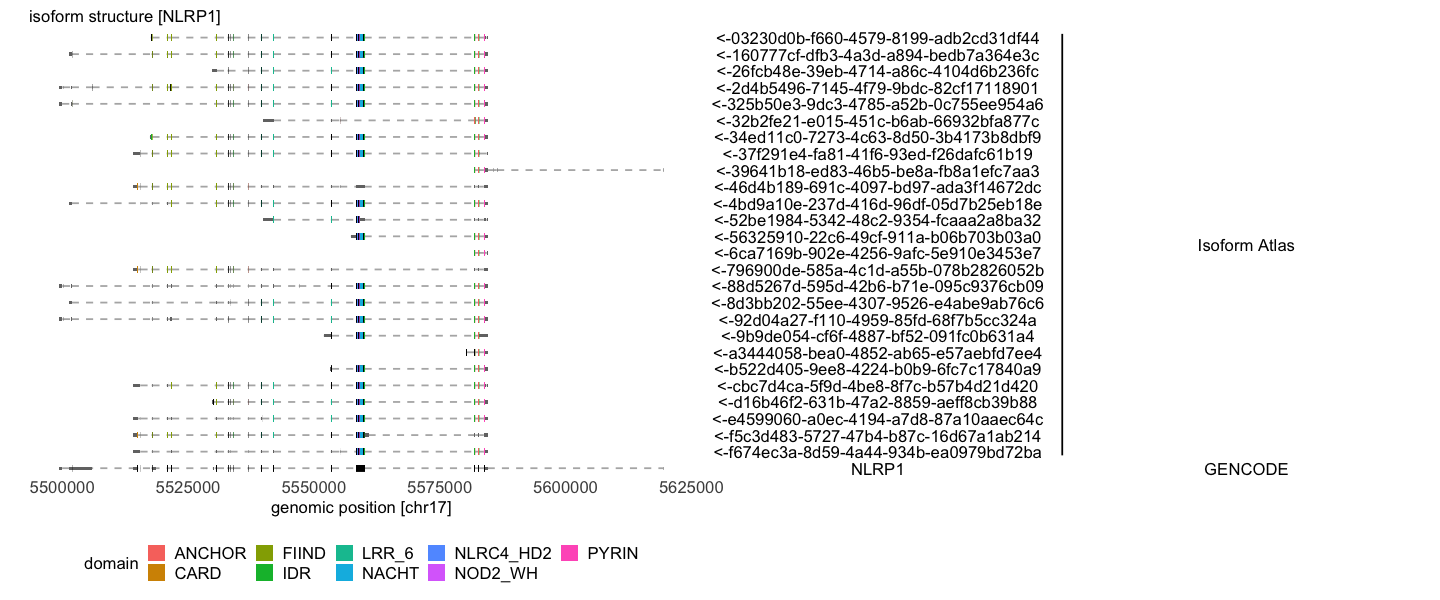

In [16]:
gene="NLRP1"

options(repr.plot.width=12, repr.plot.height=5)
g = plot_iso_structure(gene = gene, extra = 1e03, repeat_draw = FALSE, atac_draw = FALSE, rip_draw = FALSE, uorf_draw = FALSE) + theme(strip.text.y=element_text(angle = 0, size=10, color="black"))
g <- ggplotGrob(g)
for(i in which(grepl("strip-r", g$layout$name))){
  g$grobs[[i]]$layout$clip <- "off"
}
grid::grid.draw(g)

pdf("./Figure4e1.pdf", width=12, height=7)
grid::grid.draw(g)
dev.off()

pdf 
  2

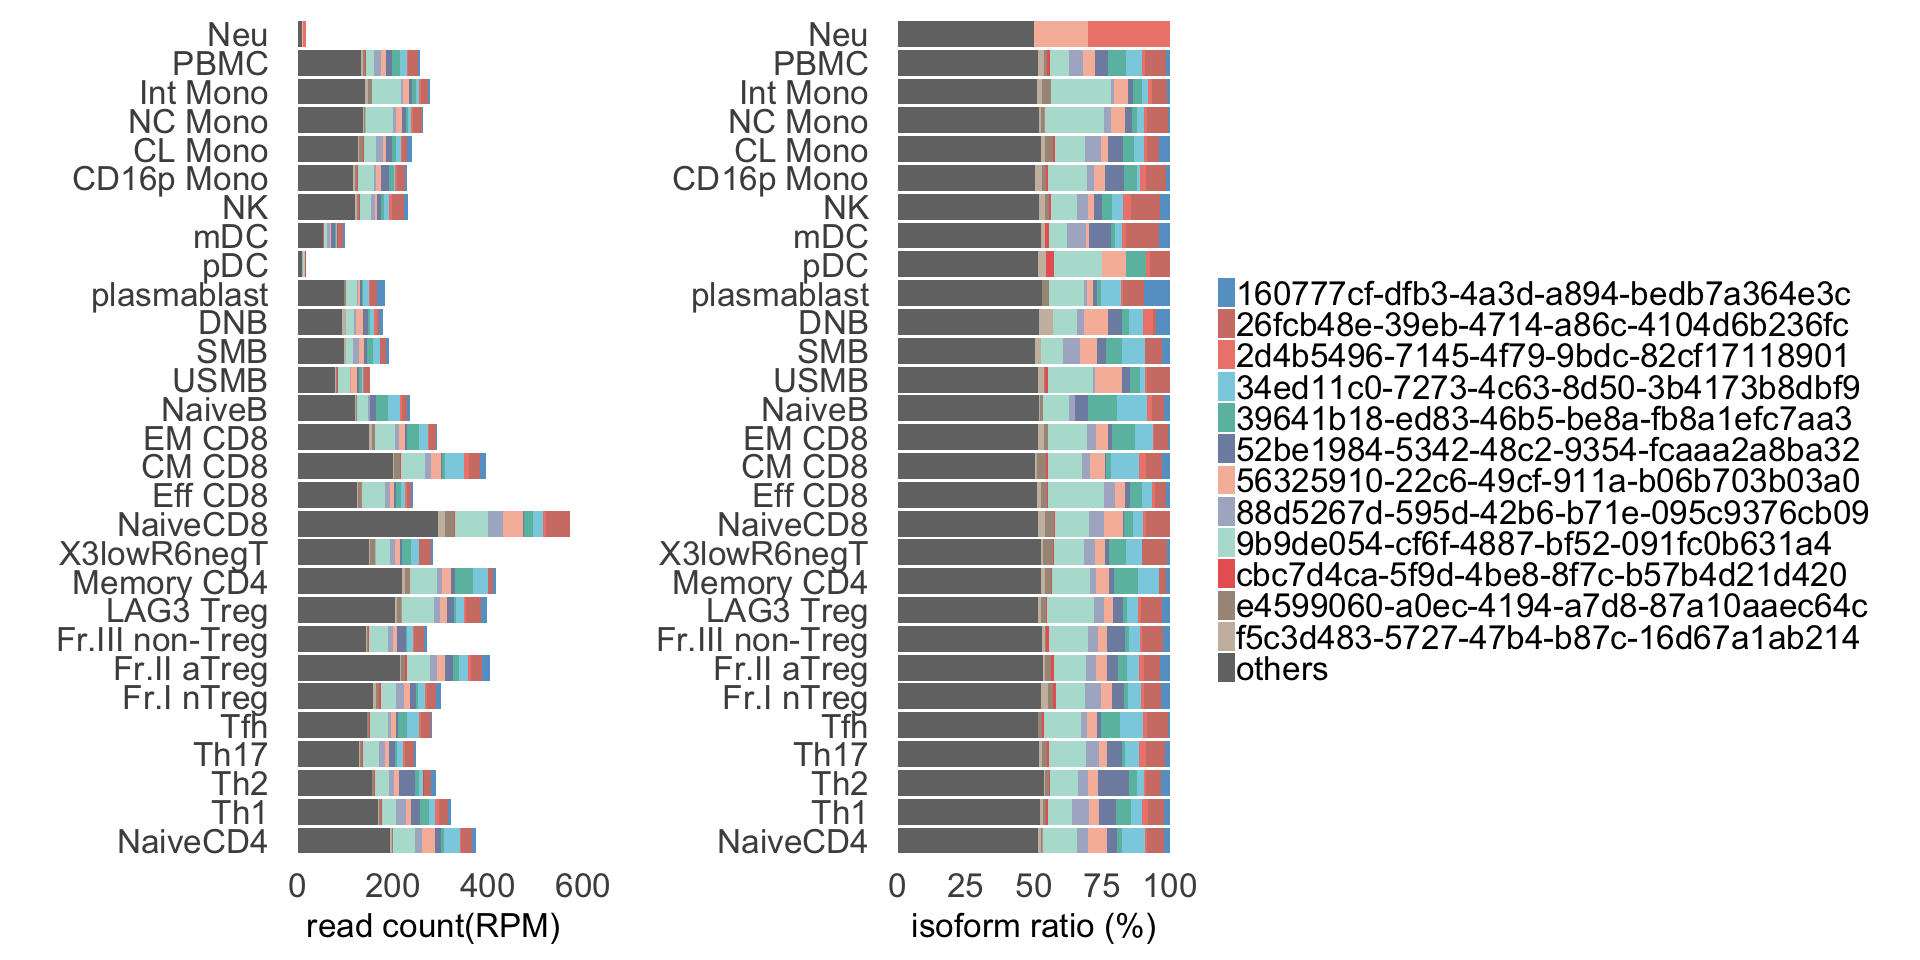

In [17]:
options(repr.plot.width=16, repr.plot.height=8)

g = ggarrange(plot_iso_usage(gene = gene, method = "sum", legend = "right"), plot_iso_usage(gene = gene, method = "ratio", legend = "right"), 
          ncol = 2, 
          legend = "right", 
          common.legend = TRUE)
g
pdf("./Figure4e2.pdf", width=16, height=8)
g
dev.off()

[1] "plotting..."


pdf 
  2

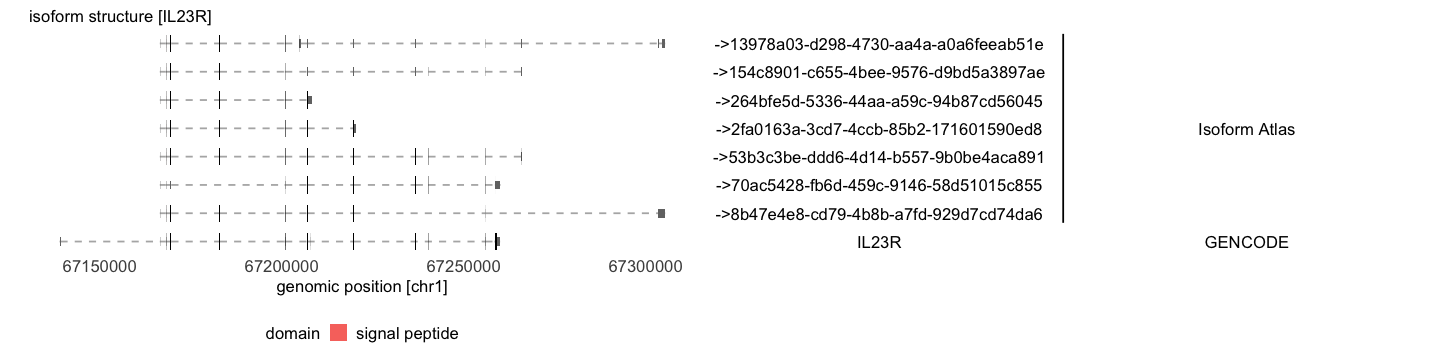

In [18]:
gene="IL23R"

options(repr.plot.width=12, repr.plot.height=3)
g = plot_iso_structure(gene = gene, extra = 1e03, repeat_draw = FALSE, atac_draw = FALSE, rip_draw = FALSE, uorf_draw = FALSE) + theme(strip.text.y=element_text(angle = 0, size=10, color="black"))
g <- ggplotGrob(g)
for(i in which(grepl("strip-r", g$layout$name))){
  g$grobs[[i]]$layout$clip <- "off"
}
grid::grid.draw(g)

pdf("./Figure4f1.pdf", width=12, height=3)
grid::grid.draw(g)
dev.off()

pdf 
  2

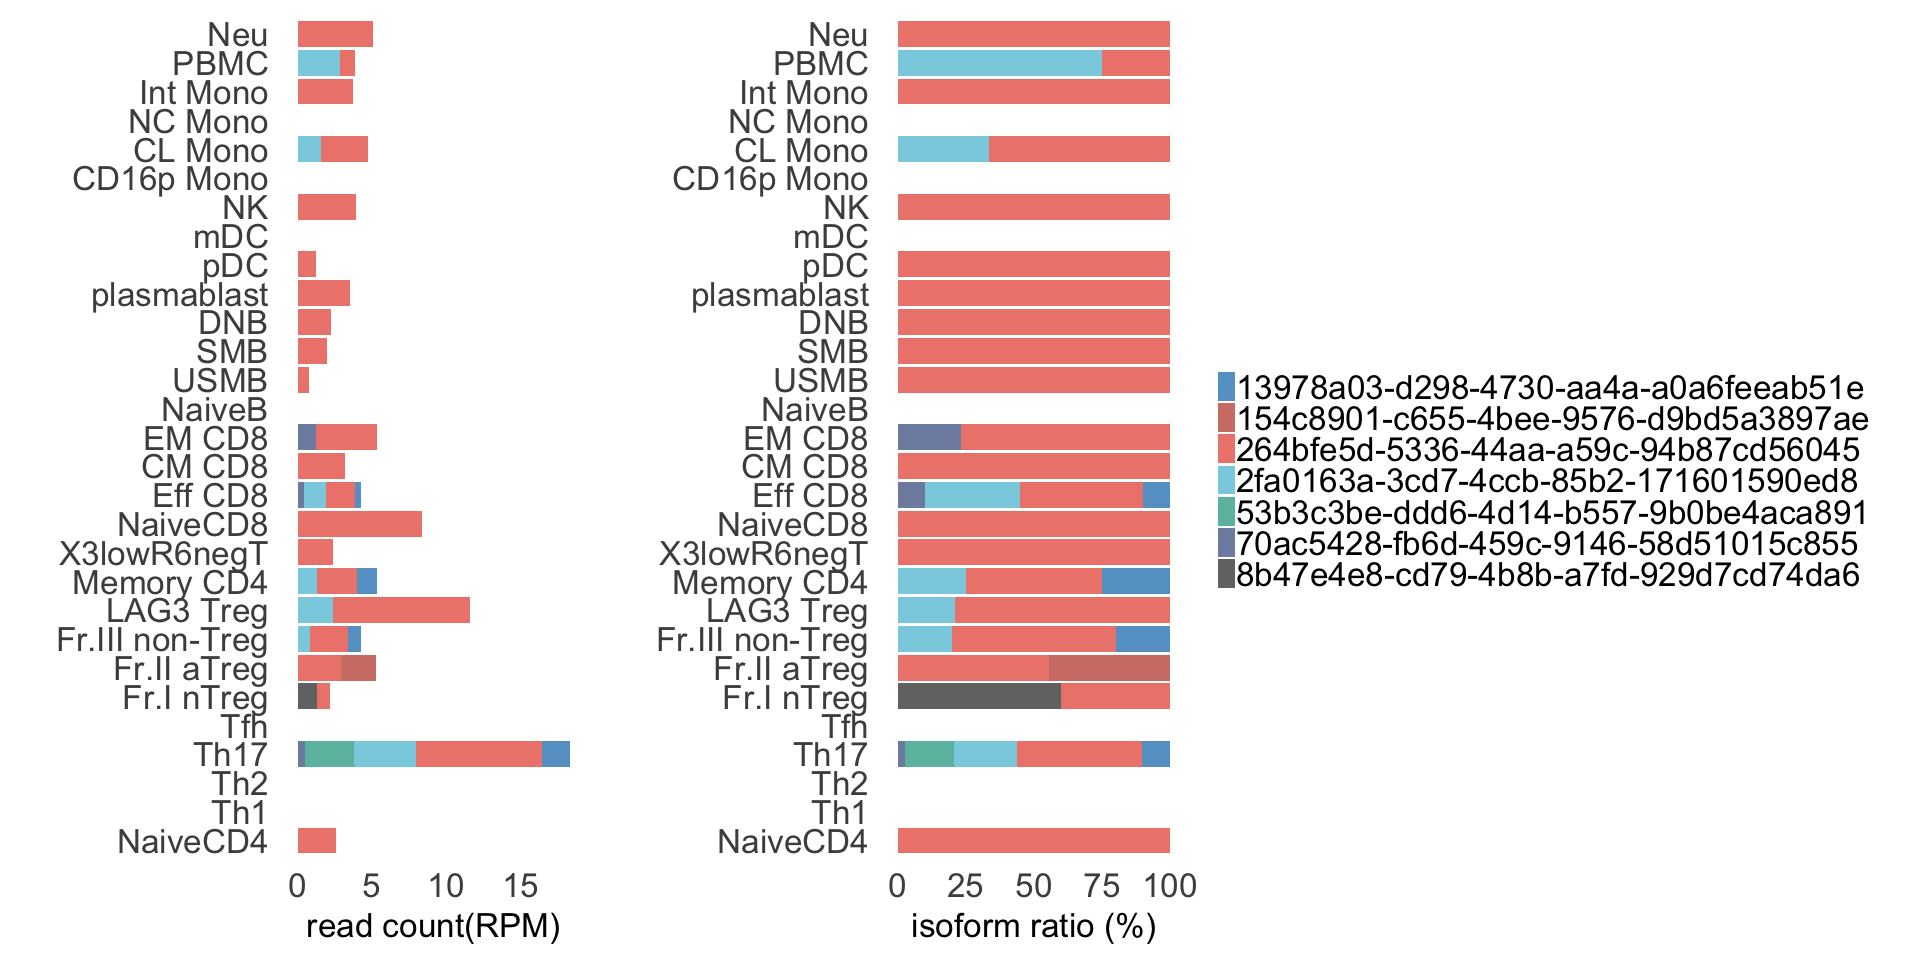

In [19]:
options(repr.plot.width=16, repr.plot.height=8)

g = ggarrange(plot_iso_usage(gene = gene, method = "sum", legend = "right"), plot_iso_usage(gene = gene, method = "ratio", legend = "right"), 
          ncol = 2, 
          legend = "right", 
          common.legend = TRUE)
g
pdf("./Figure4f2.pdf", width=16, height=8)
g
dev.off()